In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.base import TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

In [3]:
df = pd.read_csv('./Data/no_nans.csv')

In [4]:
df.head()

,title,selftext,subreddit,text
0,How much did you spend on an engagement ring?,I'm already aware the (percentage) of your sal...,AskMen,How much did you spend on an engagement ring?I...
1,How common is it for your girl to snoop in you...,I'm in my late 20s and most girls I've dated i...,AskMen,How common is it for your girl to snoop in you...
2,When was the last time you lost cash you were ...,I'm a little mad at myself. I bought takeout ...,AskMen,When was the last time you lost cash you were ...
3,Would you enter into a relationship with a gir...,"If no, what other things does she need to me r...",AskMen,Would you enter into a relationship with a gir...
4,"Twins of Askmen, is it a blessing or a curse?","Blessing: You can literally talk to yourself, ...",AskMen,"Twins of Askmen, is it a blessing or a curse?B..."


In [7]:
df['subreddit'] = df['subreddit'].map(lambda x:0 if x == 'AskMen' else 1)

In [8]:
x = df['text']
y = df['subreddit']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y , stratify = y, random_state = 13)

In [11]:
pipe = Pipeline([
    ('tf', TfidfVectorizer()),
('lr', LogisticRegression())
])

pipe_params = {'tf__max_df': [.8, .9],
              'tf__min_df':[1, 2],
              'tf__ngram_range': [(1, 1), (1, 2)],
              'tf__stop_words':['english', None ]}

gs = GridSearchCV(pipe, 
                 pipe_params)

gs.fit(x_train, y_train)

print (gs.best_score_)
print (gs.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.675206611570248
{'tf__max_df': 0.8, 'tf__min_df': 2, 'tf__ngram_range': (1, 2), 'tf__stop_words': None}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
gs.score(x_test, y_test)

0.6889714993804213

In [14]:
pipe2 = Pipeline([
    ('cvec', CountVectorizer()),
('rf', RandomForestClassifier())
])

pipe_params = {'cvec__max_df': [.8, .9, .99],
              'cvec__min_df':[1, 2, 3, 5], 
              'cvec__ngram_range': [(1, 1), (1, 2)],
              'cvec__stop_words':['english'],
               'rf__n_estimators':[150, 200]}

gs = GridSearchCV(pipe2, 
                 pipe_params)

gs.fit(x_train, y_train)

print (gs.best_score_)
print (gs.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6818181818181818
{'cvec__max_df': 0.99, 'cvec__min_df': 5, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'rf__n_estimators': 200}


In [15]:
gs.score(x_test, y_test)

0.6765799256505576

In [16]:
preds_proba = gs.predict_proba(x_test)

In [17]:
loss = y_test - preds_proba[:,0]

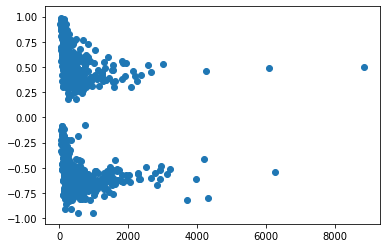

In [18]:
plt.scatter([len(x) for x in x_test], loss); 

In [22]:
sum([len(x) for x in x_test])/len(x_test)

553.1635687732341

In [23]:
lengths = [len(x) for x in x_test]

In [46]:
lengths.sort()

In [48]:
lengths[:20]

[21,
 37,
 40,
 43,
 48,
 49,
 52,
 54,
 57,
 58,
 59,
 59,
 61,
 62,
 62,
 64,
 65,
 66,
 67,
 68]

In [28]:
stats.mode(lengths)

ModeResult(mode=array([206]), count=array([7]))

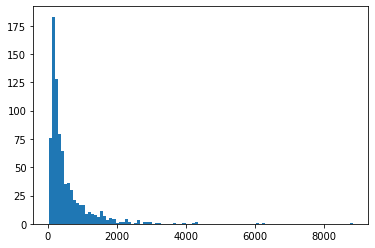

In [33]:
plt.hist(lengths, bins = 100);